# Data cleaning

Cleaned the data, removed 0 production coal mines

In [3]:
output_file = "../data/clean_coalpublic2016.csv"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [5]:
df = pd.read_excel("../data/coalpublic2016.xls", header=2, index_col="MSHA ID")

In [6]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [7]:
df['Company Type'].replace('Indepedent Producer Operator', 
                           value='Independent Producer Operator', inplace=True)

In [8]:
#rename the columns, replace all the spaces with underscore
df.rename(columns= lambda x: x.replace(" ", "_"), inplace=True)

In [9]:
# check the number of lines in the dataframe

len(df)

993

Text(0,0.5,'Total Hours Worked')

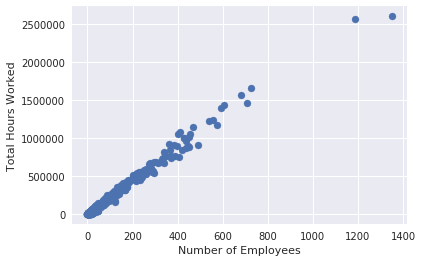

In [10]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

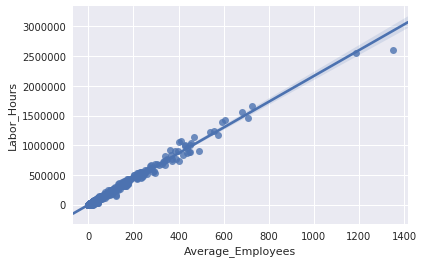

In [11]:
sns.regplot(df.Average_Employees, df.Labor_Hours)
plt.savefig("../figures/2018-03-20" + "-employees_vs_hours.png")

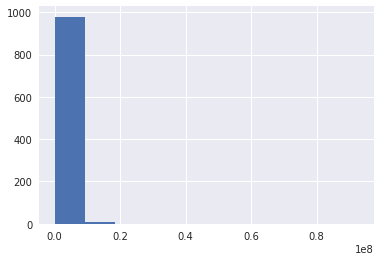

In [13]:
df['Production_(short_tons)'].hist()

In [14]:
# we are removing data here
df = df[df['Production_(short_tons)']>0]

In [15]:
df['log_production'] = np.log(df['Production_(short_tons)'])

710

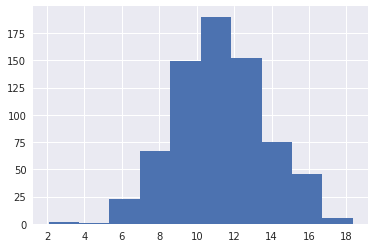

In [16]:
df['log_production'].hist()
len(df)

In [17]:
df.to_csv(output_file)